In [230]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scapy.all import *
import scapy.all

In [231]:
import commNumStartLT; from commNumStartLT import Mesure
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Modem
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Source
importlib.reload(commNumStartLT)
import commNumStartLT; from commNumStartLT import Canal
importlib.reload(commNumStartLT)

<module 'commNumStartLT' from 'c:\\Users\\energ\\Code\\TP_RT3R05\\commNumStartLT.py'>

Création d'un signal QPSK 

Mapping de la séquence binaire : [-1.+1.j  1.+1.j -3.-3.j  3.+1.j  1.+1.j  3.-1.j -1.+1.j  1.-3.j -3.+1.j
  3.+1.j -1.+3.j -1.-1.j -1.+3.j -3.-1.j  1.-3.j  3.+1.j -3.+3.j -3.-3.j
 -3.-1.j  3.+3.j  1.-1.j  3.+1.j -1.+3.j  3.+3.j  1.-3.j  1.+3.j  1.+1.j
  1.+3.j  1.-3.j  1.-1.j  3.-3.j  1.+3.j -3.-1.j -3.+1.j  3.+1.j -1.+3.j
 -1.+3.j  1.-1.j  1.-3.j  1.+1.j  1.+3.j -3.+1.j  1.-3.j -1.+3.j  3.+1.j
 -1.-1.j -1.+1.j -1.-1.j  1.-1.j  1.+1.j  3.-3.j  1.-1.j  3.-1.j  3.-3.j
  1.-3.j  1.+3.j  3.-1.j -3.-1.j -1.-3.j -3.+3.j  3.+1.j -3.-1.j -1.+3.j
 -1.+1.j -1.+3.j  3.+3.j -1.+3.j -1.-1.j  3.+3.j  1.+1.j  3.+3.j  1.+1.j
 -3.-1.j -1.-1.j -3.+1.j  1.-1.j  1.+1.j  3.+1.j -1.-1.j -3.+3.j  1.-3.j
 -3.+3.j  3.-1.j -3.-3.j -3.+3.j  3.+3.j  3.+3.j -3.-3.j -3.-1.j -3.+1.j
  3.-3.j  1.-3.j  1.-3.j  3.-3.j  1.-3.j  1.-3.j -3.+3.j -1.+3.j -1.+1.j
  3.+1.j -3.+3.j  3.-1.j -1.-1.j -3.+1.j -1.-1.j  3.-3.j  3.+1.j  1.+1.j
 -3.-3.j  3.-3.j -1.+1.j -3.-3.j  1.+1.j -3.+3.j  1.-3.j  3.-1.j -3.-3.j
  3.+1.j -1.+3.j  

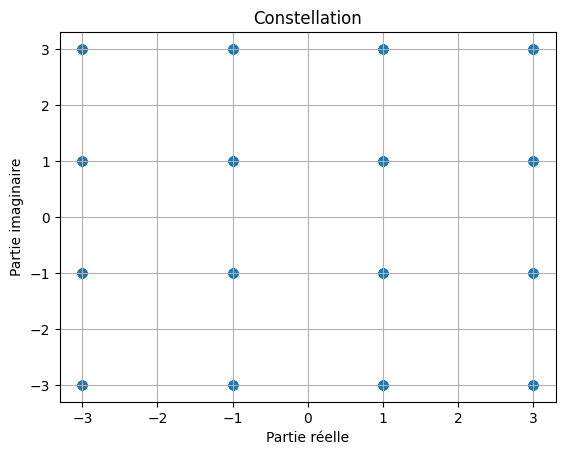

In [232]:
bits = Source.random(2000)
MyModem = Modem('QAM', 16, bits=bits)
MyMap = MyModem.mapping(1)
print("Mapping de la séquence binaire :", MyMap)
print("Le nombre de symboles est :", MyModem.nsymb)
print("Le nombre de bits est :", MyModem.bits)

# Affichage de la constellation

plt.figure()
plt.scatter(np.real(MyMap), np.imag(MyMap))
plt.title("Constellation")
plt.xlabel("Partie réelle")
plt.ylabel("Partie imaginaire")
plt.grid()
plt.show()

# Affichage du diagramme de constellation




Calcul des paramètres

$R = 50$ bits/s
$fe = 10^3$ Hz
$f_0 = 500$ Hz 
$$ 

$$
on cherche D le débit binnaire 
$$
$$
$ D = R*\log_{2}(N) = R*2 = 100$ Bauds
$$
$$
On cherche maintenant le facteur d'upsampling :
$$
$$
upsampling = $ \frac{fe}{R} = \frac{10^3}{50} = 20 $

Le signal filtré est de longueur : 100000


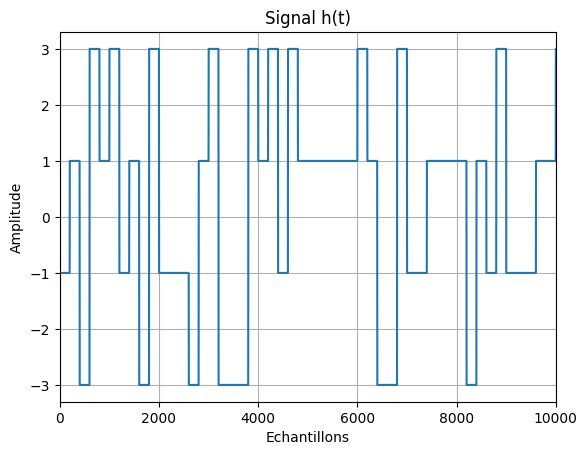

In [233]:
# Modulation QPSK
# Rapidité de modulation = 50 symboles/s
# Fréquence d’échantillonnage : 10KHz
# Fréquence porteuse : 500Hz
R = 50
fe = 10e3
f0 = 500
D = R*2
upsampling = int(fe/R)
temp_bit = 1/D

filtered = MyModem.filtre_MF(MyMap, upsampling=upsampling, filtre_type="rectangular")

# Affichage du signal filtré

plt.figure()
plt.plot(filtered)
plt.title("Signal h(t)")
plt.xlabel("Echantillons")
plt.xlim(0, 10000)
plt.ylabel("Amplitude")

plt.grid()

print("Le signal filtré est de longueur :", len(filtered))
#Affichage des bits en print







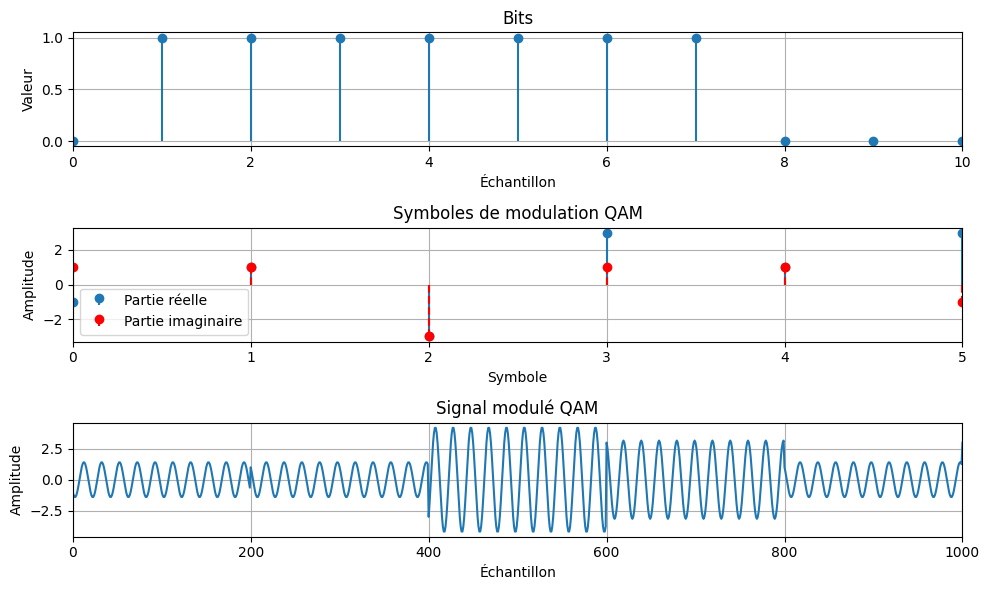

In [234]:

# Translation de fréquence
nb_symbs_aff = 5
nb_bits_aff = nb_symbs_aff * 2
nb_ech_aff = nb_symbs_aff * upsampling

translated_signal = MyModem.upconv(filtered, f0, 1/fe)

plt.figure(figsize=(10, 6))

# 1. Tracé des bits
plt.subplot(3, 1, 1)
plt.stem(bits, basefmt=" ")
plt.title("Bits")
plt.xlim(0, nb_bits_aff)
plt.xlabel("Échantillon")
plt.ylabel("Valeur")
plt.grid()


# 2. Tracé des symboles de modulation (partie réelle et imaginaire)
plt.subplot(3, 1, 2)
plt.stem(np.real(MyMap), label="Partie réelle", basefmt=" ")
plt.stem(np.imag(MyMap), label="Partie imaginaire", linefmt='r--', markerfmt='ro', basefmt=" ")
plt.title("Symboles de modulation QAM")
plt.xlim(0, nb_symbs_aff)
plt.xlabel("Symbole")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# 3. Tracé du signal modulé QPSK
plt.subplot(3, 1, 3)
plt.plot(translated_signal)
plt.title("Signal modulé QAM")
plt.xlim(0, nb_ech_aff)
plt.xlabel("Échantillon")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.grid()
plt.show()


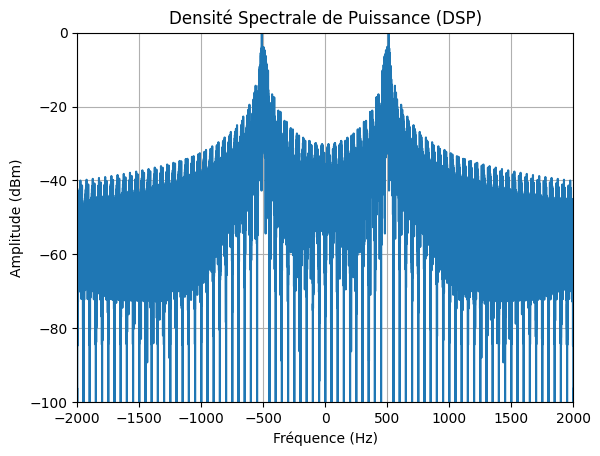

(array([-5000. , -4999.9, -4999.8, ...,  4999.7,  4999.8,  4999.9]),
 array([-272.85899737, -105.39438038,  -90.15691661, ...,  -91.23844277,
         -90.15691661, -105.39438038]))

In [235]:
myTransletedSignal = Mesure(translated_signal)

myTransletedSignal.DSP(fe, type="Bi", unit="dBm")


## Canal AWGN

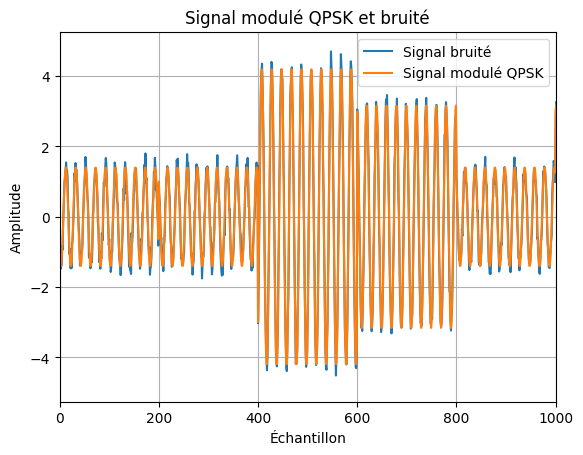

In [250]:

MyCanel = Canal.awgn(translated_signal, 0, std=0.2)

# Affichage du signal bruité et clair

plt.figure()
plt.plot(MyCanel, label="Signal bruité")
plt.plot(translated_signal, label="Signal modulé QPSK")
plt.title("Signal modulé QPSK et bruité")
plt.xlabel("Échantillon")
plt.xlim(0, nb_ech_aff)
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()






## Recepteur QPSK

In [251]:
demod_signal = MyModem.downconv(MyCanel, f0, 1/fe, symb_type='complexe')


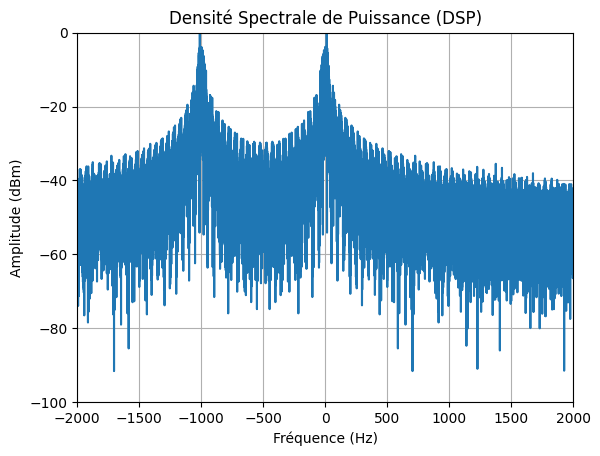

(array([-5000. , -4999.9, -4999.8, ...,  4999.7,  4999.8,  4999.9]),
 array([-47.25880761, -50.53640381, -61.29703432, ..., -49.34339545,
        -51.14145071, -51.80455307]))

In [254]:
MyMesure_of_mycanel = Mesure(demod_signal)
plt.xlim(-1500, 1500)
MyMesure_of_mycanel.DSP(fe, type="Bi", unit="dBm")

Text(0, 0.5, 'Amplitude')

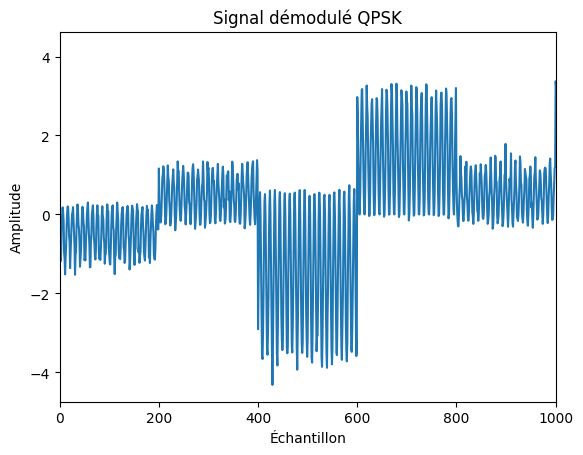

In [239]:

# Demodulation QPSK




demod_signal = MyModem.downconv(MyCanel, f0, 1/fe, symb_type='complexe')

# Affichage du signal démodulé

plt.figure()
plt.plot(demod_signal)
plt.title("Signal démodulé QPSK")
plt.xlabel("Échantillon")
plt.xlim(0, nb_ech_aff)
plt.ylabel("Amplitude")






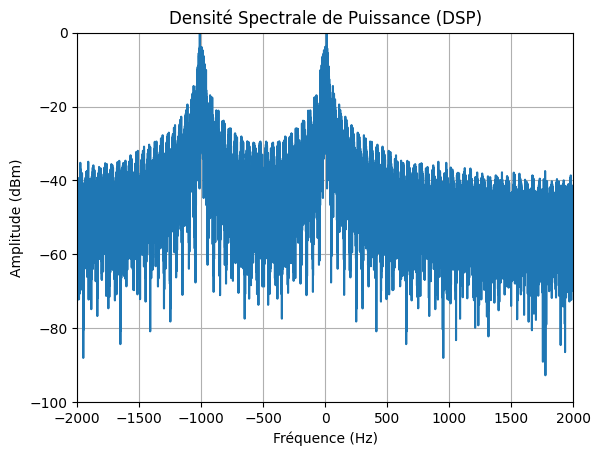

(array([-5000. , -4999.9, -4999.8, ...,  4999.7,  4999.8,  4999.9]),
 array([-61.99426786, -50.47317418, -48.89619482, ..., -57.64065046,
        -47.97052296, -51.54720138]))

In [240]:
plt.xlim(-1500, 1500)
plt.ylim(-60, -15)
MyMesure = Mesure(demod_signal)
MyMesure.DSP(fe, type="Bi", unit="dBm")


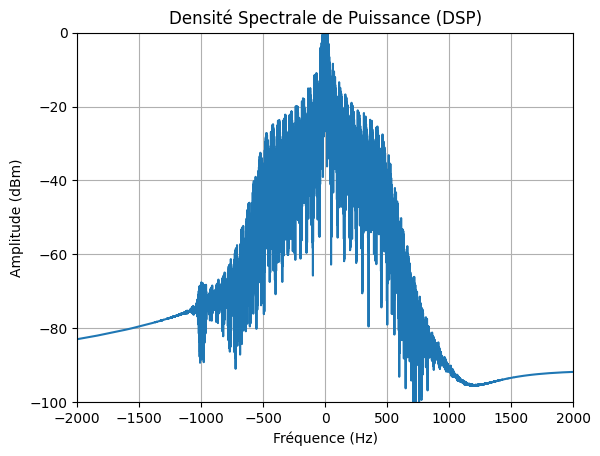

(array([-5000. , -4999.9, -4999.8, ...,  4999.7,  4999.8,  4999.9]),
 array([-90.95724271, -90.95714997, -90.95705724, ..., -90.95752085,
        -90.95742814, -90.95733543]))

In [241]:
# Filtrage pour garder la partie du spectre en bande de base
filtered_signal = 2*MyModem.filtre_rcv(demod_signal, fe, fc=500, type="butter")

# Affichage du signal filtré
plt.xlim(-1500, 1500)
plt.ylim(-60, -15)
MyMesure = Mesure(filtered_signal)
MyMesure.DSP(fe, type="Bi", unit="dBm")


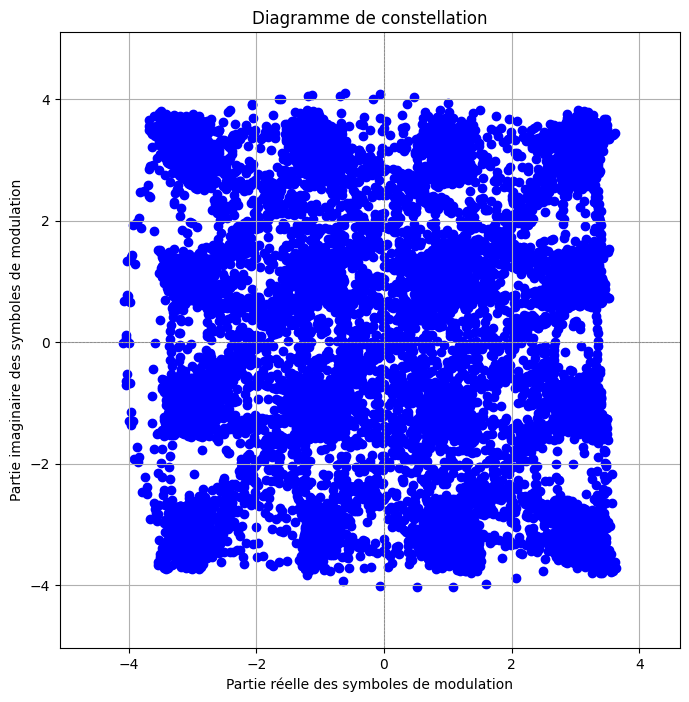

In [242]:
# Visualisation du diagramme de constellation du signal en bande de base 

myconstellation = Mesure(filtered_signal)
myconstellation.plot_constellation(filtered_signal)


In [243]:
# Downsampling du signal
downsampling = upsampling
offset = int(downsampling/2)
print(downsampling)
downsampled_signal = MyModem.downsample(filtered_signal, downsampling, offset)

200


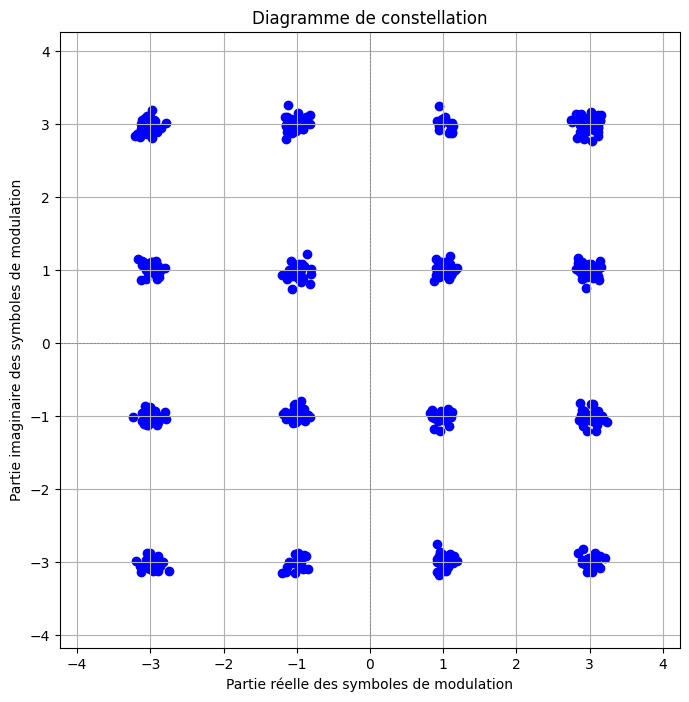

In [244]:
myconstellation2 = Mesure(downsampled_signal)
myconstellation2.plot_constellation(downsampled_signal)

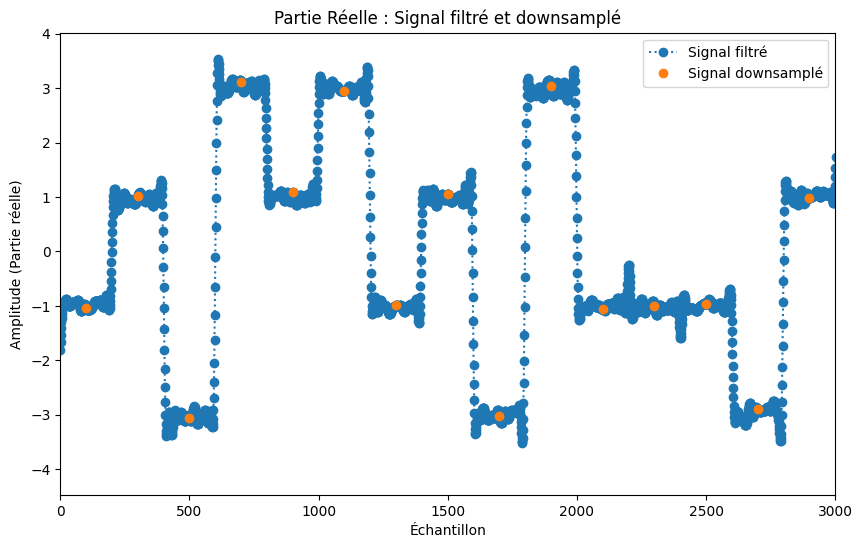

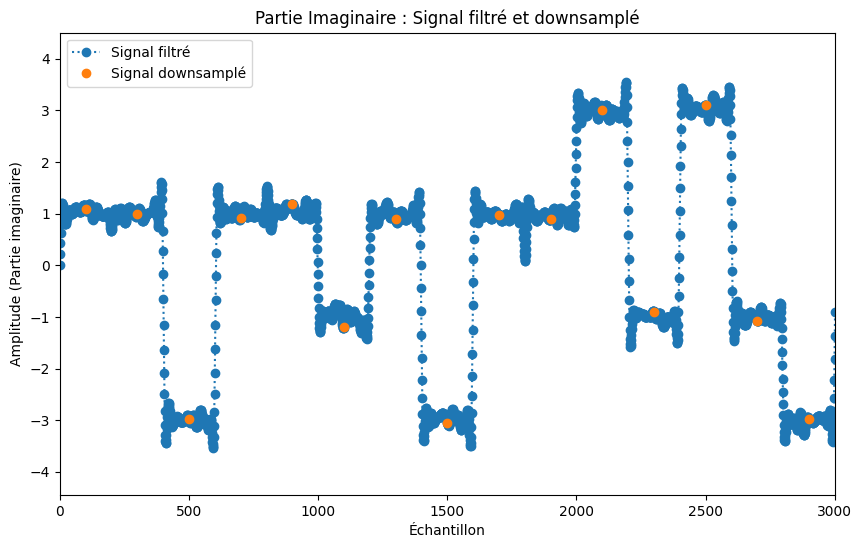

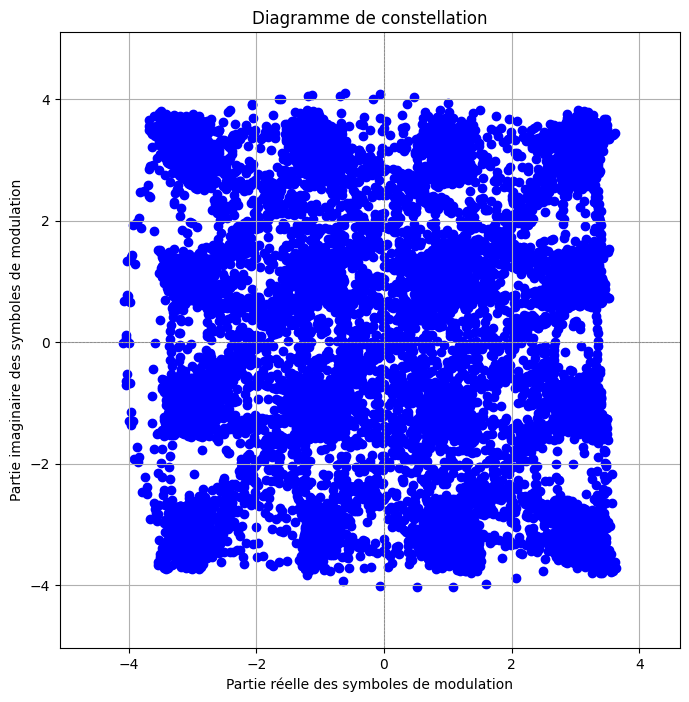

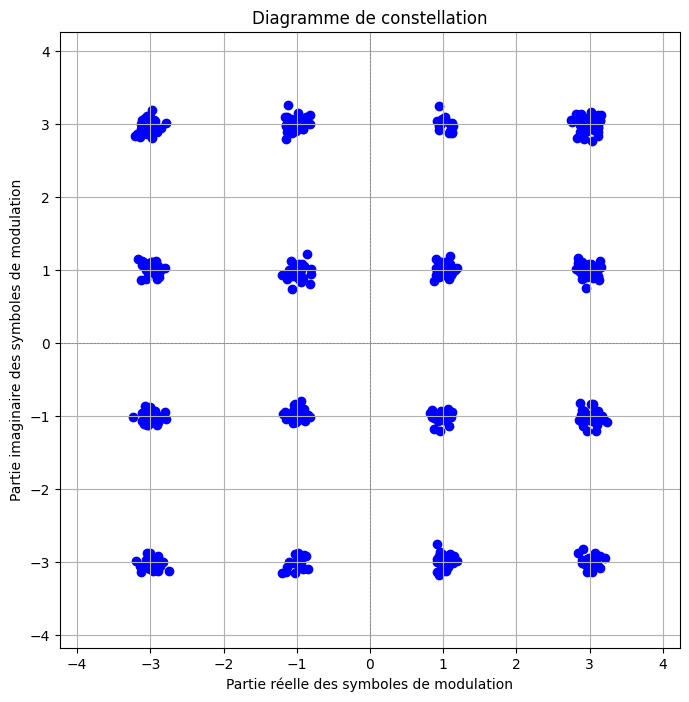

In [245]:
new_vector = np.arange(offset, len(filtered_signal), downsampling)

# Figure 1 : Partie réelle
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(np.real(filtered_signal), "o:", label="Signal filtré")
ax1.plot(new_vector, np.real(downsampled_signal), "o", label="Signal downsamplé")
ax1.set_xlim(0, 3000)
ax1.set_title("Partie Réelle : Signal filtré et downsamplé")
ax1.set_xlabel("Échantillon")
ax1.set_ylabel("Amplitude (Partie réelle)")
ax1.legend()
plt.show()

# Figure 2 : Partie imaginaire
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(np.imag(filtered_signal), "o:", label="Signal filtré")
ax2.plot(new_vector, np.imag(downsampled_signal), "o", label="Signal downsamplé")
ax2.set_xlim(0, 3000)
ax2.set_title("Partie Imaginaire : Signal filtré et downsamplé")
ax2.set_xlabel("Échantillon")
ax2.set_ylabel("Amplitude (Partie imaginaire)")
ax2.legend()
plt.show()

# Figure 3 : Constellation
myconstellation.plot_constellation(filtered_signal)
myconstellation2.plot_constellation(downsampled_signal)
plt.show()


In [246]:
# Détéction des symboles QPSK
detected_bits = MyModem.detection(MyMap)
print("Les bits détectés sont :", detected_bits)

print('les bits de départs sont : ' , MyMap)

error_rate = MyModem.calcul_erreur_decodage(MyMap, detected_bits)
print(error_rate)


Les bits détectés sont : [-1.+1.j  1.+1.j -3.-3.j  3.+1.j  1.+1.j  3.-1.j -1.+1.j  1.-3.j -3.+1.j
  3.+1.j -1.+3.j -1.-1.j -1.+3.j -3.-1.j  1.-3.j  3.+1.j -3.+3.j -3.-3.j
 -3.-1.j  3.+3.j  1.-1.j  3.+1.j -1.+3.j  3.+3.j  1.-3.j  1.+3.j  1.+1.j
  1.+3.j  1.-3.j  1.-1.j  3.-3.j  1.+3.j -3.-1.j -3.+1.j  3.+1.j -1.+3.j
 -1.+3.j  1.-1.j  1.-3.j  1.+1.j  1.+3.j -3.+1.j  1.-3.j -1.+3.j  3.+1.j
 -1.-1.j -1.+1.j -1.-1.j  1.-1.j  1.+1.j  3.-3.j  1.-1.j  3.-1.j  3.-3.j
  1.-3.j  1.+3.j  3.-1.j -3.-1.j -1.-3.j -3.+3.j  3.+1.j -3.-1.j -1.+3.j
 -1.+1.j -1.+3.j  3.+3.j -1.+3.j -1.-1.j  3.+3.j  1.+1.j  3.+3.j  1.+1.j
 -3.-1.j -1.-1.j -3.+1.j  1.-1.j  1.+1.j  3.+1.j -1.-1.j -3.+3.j  1.-3.j
 -3.+3.j  3.-1.j -3.-3.j -3.+3.j  3.+3.j  3.+3.j -3.-3.j -3.-1.j -3.+1.j
  3.-3.j  1.-3.j  1.-3.j  3.-3.j  1.-3.j  1.-3.j -3.+3.j -1.+3.j -1.+1.j
  3.+1.j -3.+3.j  3.-1.j -1.-1.j -3.+1.j -1.-1.j  3.-3.j  3.+1.j  1.+1.j
 -3.-3.j  3.-3.j -1.+1.j -3.-3.j  1.+1.j -3.+3.j  1.-3.j  3.-1.j -3.-3.j
  3.+1.j -1.+3.j  3.-1.j  

In [247]:
# Démapping des symboles

demap_bits = MyModem.demapping(detected_bits)
print("Les bits de départs sont : " , bits)
print("Les bits détéctés : " , demap_bits.flatten())




Les bits de départs sont :  [0 1 1 ... 1 1 0]
Les bits détéctés :  [0 1 1 ... 1 1 0]


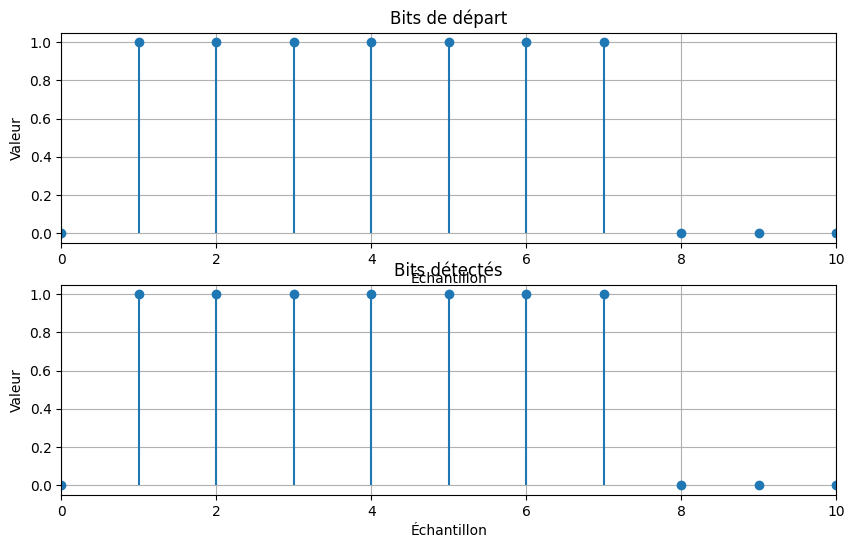

In [248]:
# Affichage des bits de départ et des bits détectés sur 2 graphics

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)

plt.stem(bits, basefmt=" ")

plt.title("Bits de départ")

plt.xlabel("Échantillon")
plt.xlim(0, nb_bits_aff)
plt.ylabel("Valeur")

plt.grid()

plt.subplot(2, 1, 2)

plt.stem(demap_bits.flatten(), basefmt=" ")

plt.title("Bits détectés")

plt.xlabel("Échantillon")
plt.xlim(0, nb_bits_aff)
plt.ylabel("Valeur")

plt.grid()

plt.show()

## Transmission  d'un packet ICMP en QPSK

[0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

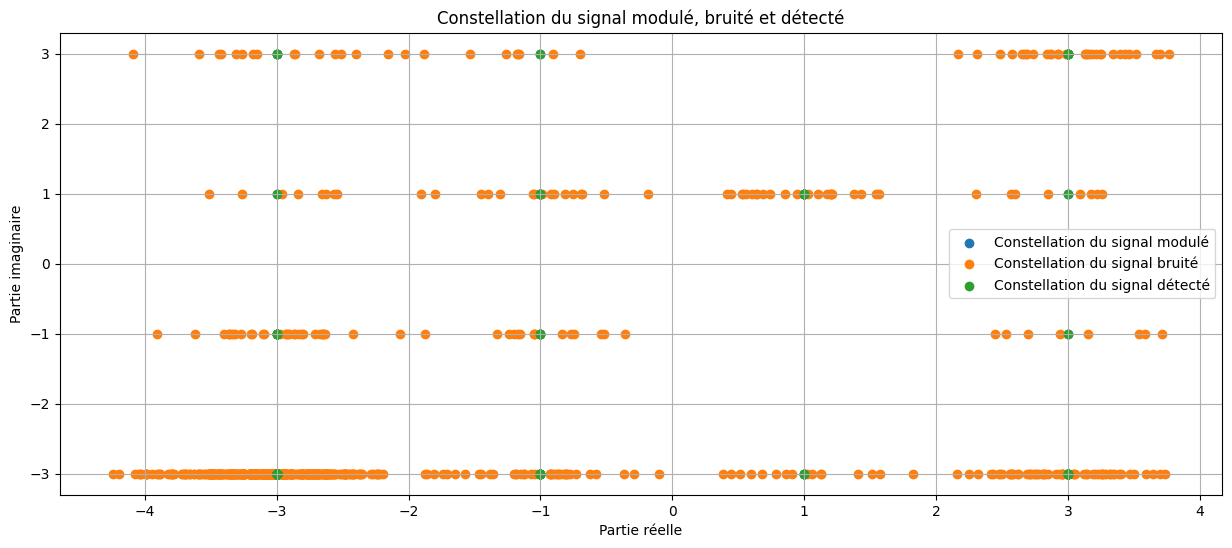

###[ Ethernet ]### 
  dst       = 06:07:08:09:0a:0b
  src       = 00:01:02:03:04:05
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 28
     id        = 1
     flags     = 
     frag      = 0
     ttl       = 64
     proto     = icmp
     chksum    = 0xa024
     src       = 192.168.10.4
     dst       = 8.8.8.8
     \options   \
###[ ICMP ]### 
        type      = echo-request
        code      = 0
        chksum    = 0xf7ff
        id        = 0x0
        seq       = 0x0
        unused    = ''



In [249]:
##############################################################################################################
##############Caractéristiques de la Transmission Numérique###################################################
##############################################################################################################

#Emetteur icmp
ip_destination = '8.8.8.8'
ip_source = '192.168.10.4'


# Canal de transmission
mean = 0
std = 0.4


# Recepteur




##############################################################################################################
##############              Emetteur             #############################################################
##############################################################################################################

#Source

packet = Source.icmp(ip_dest=ip_destination, ip_src=ip_source)
print(packet)
#Création et initialisation des paramètres du modem 

MyNemModem2 = Modem('QAM', 16, bits=packet)


#Maping

MyMappe = MyNemModem2.mapping(3)

#Filtre de mise en forme

Mysamples = MyNemModem2.filtre_MF(MyMappe, upsampling=8, filtre_type='rectangular')


##############################################################################################################
##############              Canal de transmission             ################################################
##############################################################################################################

MyCanal = Canal.awgn(Mysamples, mean, std)


##############################################################################################################
##############              Recepteur             #############################################################
##############################################################################################################


#Downsampling


Mydownsampled_signal = MyNemModem2.downsample(MyCanal, 8, offset=4)


#Detection

MyDetection = MyNemModem2.detection(Mydownsampled_signal)

#Demapping

MyDemapping = MyNemModem2.demapping(MyDetection)
MyDemapping2 = MyDemapping.ravel()
print(MyDemapping2)
#Calcul d'erreur


# Affichage de la constellation du signal détecté, signal Modulé et signal bruité

plt.figure(figsize=(15, 6))
plt.scatter(np.real(MyMappe), np.imag(MyMappe), label='Constellation du signal modulé')
plt.scatter(np.real(MyCanal), np.imag(MyCanal), label='Constellation du signal bruité')
plt.scatter(np.real(MyDetection), np.imag(MyDetection), label='Constellation du signal détecté')
plt.title('Constellation du signal modulé, bruité et détecté')
plt.xlabel('Partie réelle')
plt.ylabel('Partie imaginaire')
plt.grid()
plt.legend()
plt.show()

myframeByte8 = MyDemapping2.reshape(int(len(MyDemapping2)/8), 8)
MyFrame_dec = np.packbits(myframeByte8)
myframe_bytes = MyFrame_dec.tobytes()

MyData = Ether(myframe_bytes)
MyData.show2()
